In [1]:
library(tidyverse)
library(scales)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
df = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/bechdel/movies.csv')
df%>%head


── Column specification ────────────────────────────────────────────────────────
cols(
  year = col_double(),
  imdb = col_character(),
  title = col_character(),
  test = col_character(),
  clean_test = col_character(),
  binary = col_character(),
  budget = col_double(),
  domgross = col_character(),
  intgross = col_character(),
  code = col_character(),
  `budget_2013$` = col_double(),
  `domgross_2013$` = col_character(),
  `intgross_2013$` = col_character(),
  `period code` = col_double(),
  `decade code` = col_double()
)




year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,budget_2013$,domgross_2013$,intgross_2013$,period code,decade code
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,1.30e+07,25682380,42195766,2013FAIL,13000000,25682380,42195766,1,1
2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,4.50e+07,13414714,40868994,2012PASS,45658735,13611086,41467257,1,1
2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,2.00e+07,53107035,158607035,2013FAIL,20000000,53107035,158607035,1,1
2013,tt1272878,2 Guns,notalk,notalk,FAIL,6.10e+07,75612460,132493015,2013FAIL,61000000,75612460,132493015,1,1
2013,tt0453562,42,men,men,FAIL,4.00e+07,95020213,95020213,2013FAIL,40000000,95020213,95020213,1,1
2013,tt1335975,47 Ronin,men,men,FAIL,2.25e+08,38362475,145803842,2013FAIL,225000000,38362475,145803842,1,1


In [3]:
clean = df%>%
filter(!grepl('#N/A', `intgross_2013$`))%>%
filter(!grepl('#N/A', `domgross_2013$`))%>%
group_by(year)%>%
mutate(adjdom = `domgross_2013$`, adjint = `intgross_2013$`, adjbudget = `budget_2013$`)%>%
mutate(adjbudget = as.numeric(adjbudget))%>%
mutate(adjdom = as.numeric(adjdom)) %>%
mutate(adjint = as.numeric(adjint))%>%
mutate(wwgross = adjdom + adjint) %>%
mutate(roi = wwgross/adjbudget)%>%
select(year, title, binary, adjbudget, wwgross, roi) %>%
filter(roi>1)%>%
arrange(year)%>%
mutate(filmsperyear = n())%>%
mutate(Decade = year%/% 10 * 10)%>%
group_by(Decade)%>%
mutate(filmsperdecade = n())
clean%>%head

#Table including necessary info needed for analysis

year,title,binary,adjbudget,wwgross,roi,filmsperyear,Decade,filmsperdecade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>
1970,Beyond the Valley of the Dolls,PASS,5997631,107957366,18.000001,1,1970,50
1971,Escape from the Planet of the Apes,FAIL,14386286,141561050,9.840000,4,1970,50
1971,Shaft,FAIL,305063707,1021529721,3.348578,4,1970,50
1971,The French Connection,FAIL,12659931,473697306,37.417053,4,1970,50
1971,Willy Wonka &amp; the Chocolate Factory,FAIL,17263543,46036114,2.666667,4,1970,50
1972,Pink Flamingos,PASS,66866,4611524,68.966650,2,1970,50


Over the years, women representation in films has been an area where Hollywood has not performed well. To further critique movies on how well female characters are written in films, many use The Bechdel Test. It is a simple test that looks at the following critera:
1.	there are at least two named women in the picture
2.	they have a conversation with each other at some point
3.	that conversation isn’t about a male character.

Above is a cleaned table of the dataset that I used for my analysis: I combined the domestic and international grosses to calculate the worldwide gross. I then divided the worldwide gross by the budget to calculate the return on investment (roi). I also added a column to specify what decade the film came out in as well as 2 other columns on how many films released in a given year/decade. It is important to note that all grosses and budgets have been adjusted for inflation (as of 2013). 

In [4]:
bar = clean %>%
group_by(Decade, binary)%>%
count(filmsperdecade)
bar%>%head

Decade,binary,filmsperdecade,n
<dbl>,<chr>,<int>,<int>
1970,FAIL,50,37
1970,PASS,50,13
1980,FAIL,115,84
1980,PASS,115,31
1990,FAIL,305,170
1990,PASS,305,135


Warning message:
“Ignoring unknown parameters: stat”


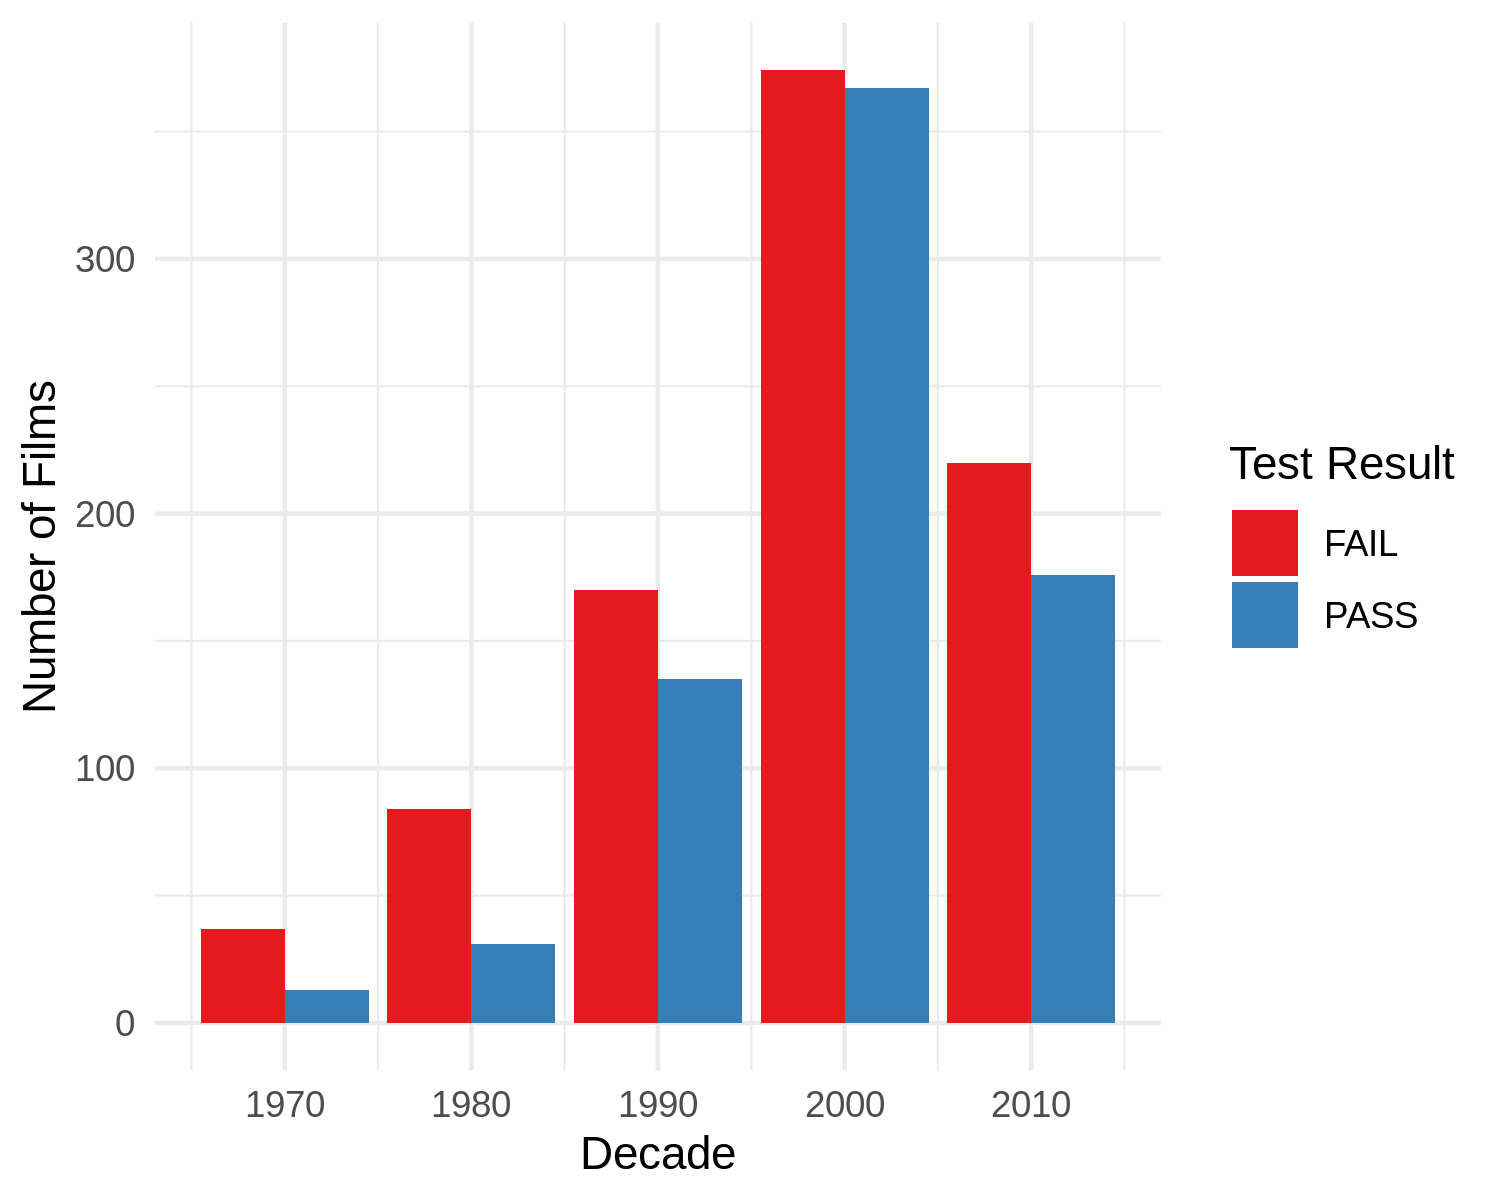

In [5]:
p = ggplot(bar, aes(x = Decade, y = n, fill = binary))

p = p + geom_col(stat = identity, position = "dodge")

p = p + scale_fill_brewer(palette = 'Set1') 

p = p + theme_minimal()

p = p + labs(y='Number of Films', fill = "Test Result")

p

#Bar Graph showing number of films in each decade by their Bechdel Test Results

The bar-graph above shows the number of films that failed and passed the Bechdel test in a given decade. The disparity between the test results is larger in the earlier decades. However, the gap is closed in the 2000s decade before increasing again in the 2010s decade. This change is most likely attributed to our society becoming more progressive over the years and placing an emphasis on female characters. The change in the 2010s decade is most likely due to the rise of blockbuster filmmaking (franchises, superheroes, etc.) It is sad that there is no decade where more films passed the test than failed.

In [6]:
gross = clean %>%
    group_by(binary, year) %>%
    summarize(wwgross = sum(wwgross)) %>%
    arrange(year) %>%
    mutate(binary = fct_inorder(binary))
gross%>%head

`summarise()` has grouped output by 'binary'. You can override using the `.groups` argument.



binary,year,wwgross
<fct>,<dbl>,<dbl>
PASS,1970,107957366
FAIL,1971,1682824191
FAIL,1972,2248171046
PASS,1972,4611524
FAIL,1973,3368269200
PASS,1973,3186206563


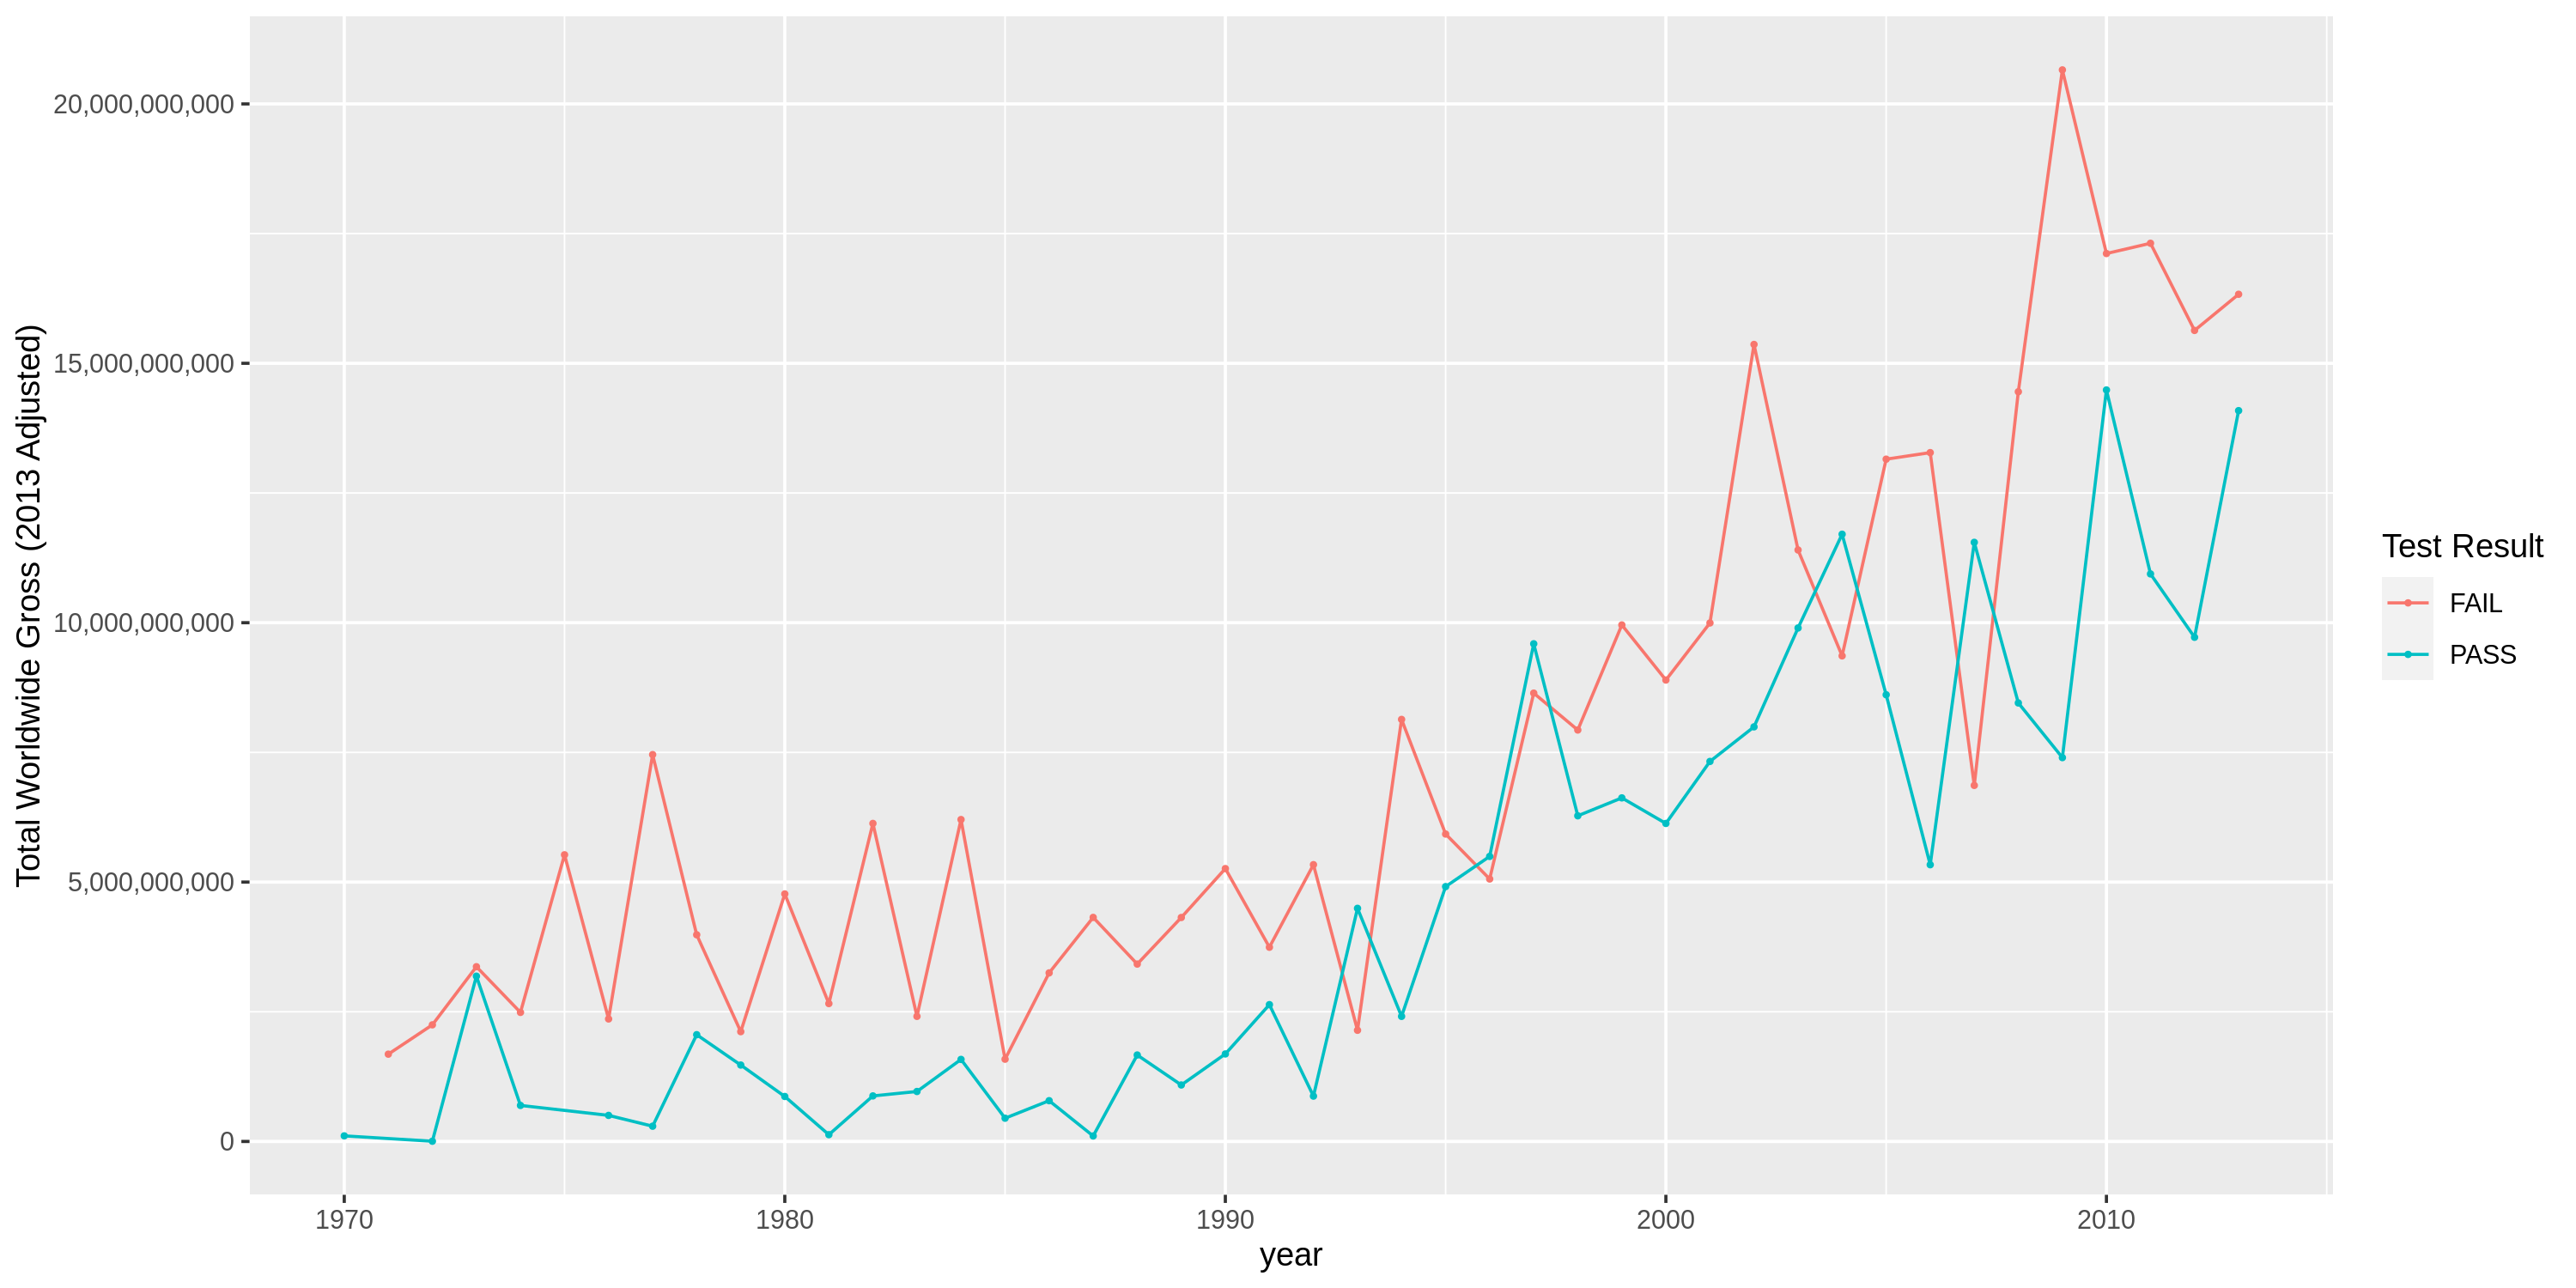

In [12]:
p1 = ggplot(gross, aes(x = year, y = wwgross, group = binary, color = binary))
p1 = p1 + geom_line() + geom_point(size = 0.5)
p1 = p1 + labs(y='Total Worldwide Gross (2013 Adjusted)', color = "Test Result")
p1 = p1 + scale_y_continuous(labels = comma)
p1

In [11]:
budget = clean %>%
    group_by(binary, year) %>%
    summarize(totbudget = sum(adjbudget)) %>%
    arrange(year) %>%
    mutate(binary = fct_inorder(binary))
budget%>%head

`summarise()` has grouped output by 'binary'. You can override using the `.groups` argument.



binary,year,totbudget
<fct>,<dbl>,<dbl>
PASS,1970,5997631
FAIL,1971,349373467
FAIL,1972,39004975
PASS,1972,66866
FAIL,1973,125732851
PASS,1973,62926730


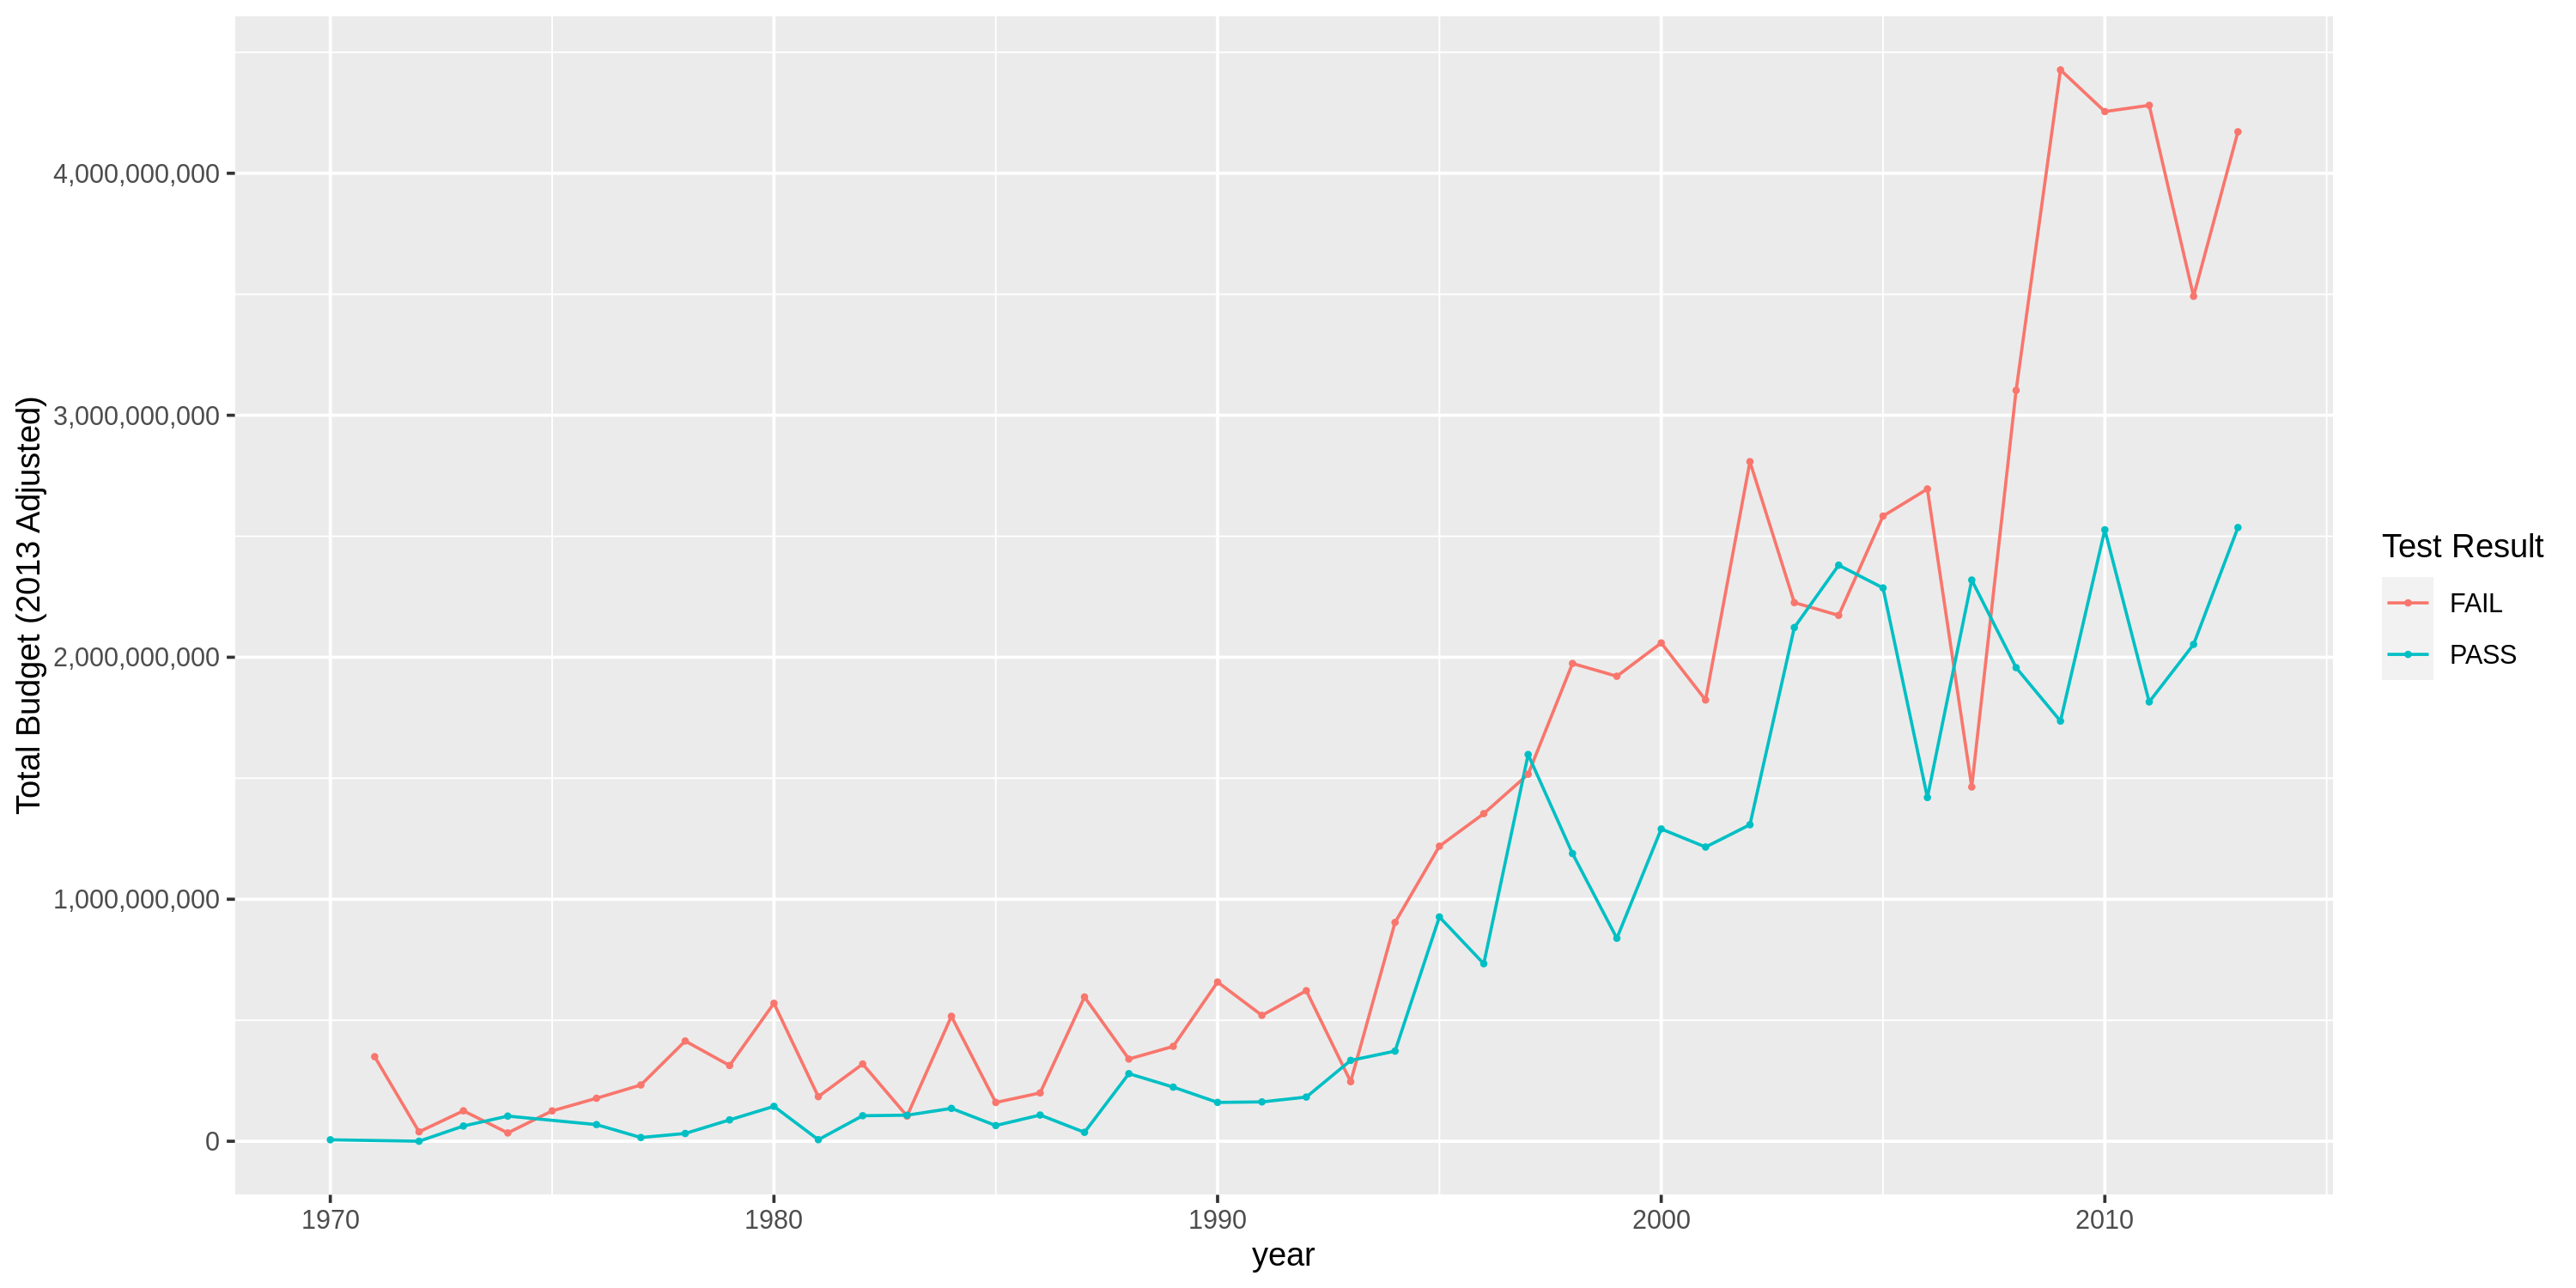

In [13]:
p2 = ggplot(budget, aes(x = year, y = totbudget, group = binary, color = binary))
p2 = p2 + geom_line() + geom_point(size = 0.5)
p2 = p2 + labs(y='Total Budget (2013 Adjusted)', color = "Test Result")
p2 = p2 + scale_y_continuous(labels = comma)
p2

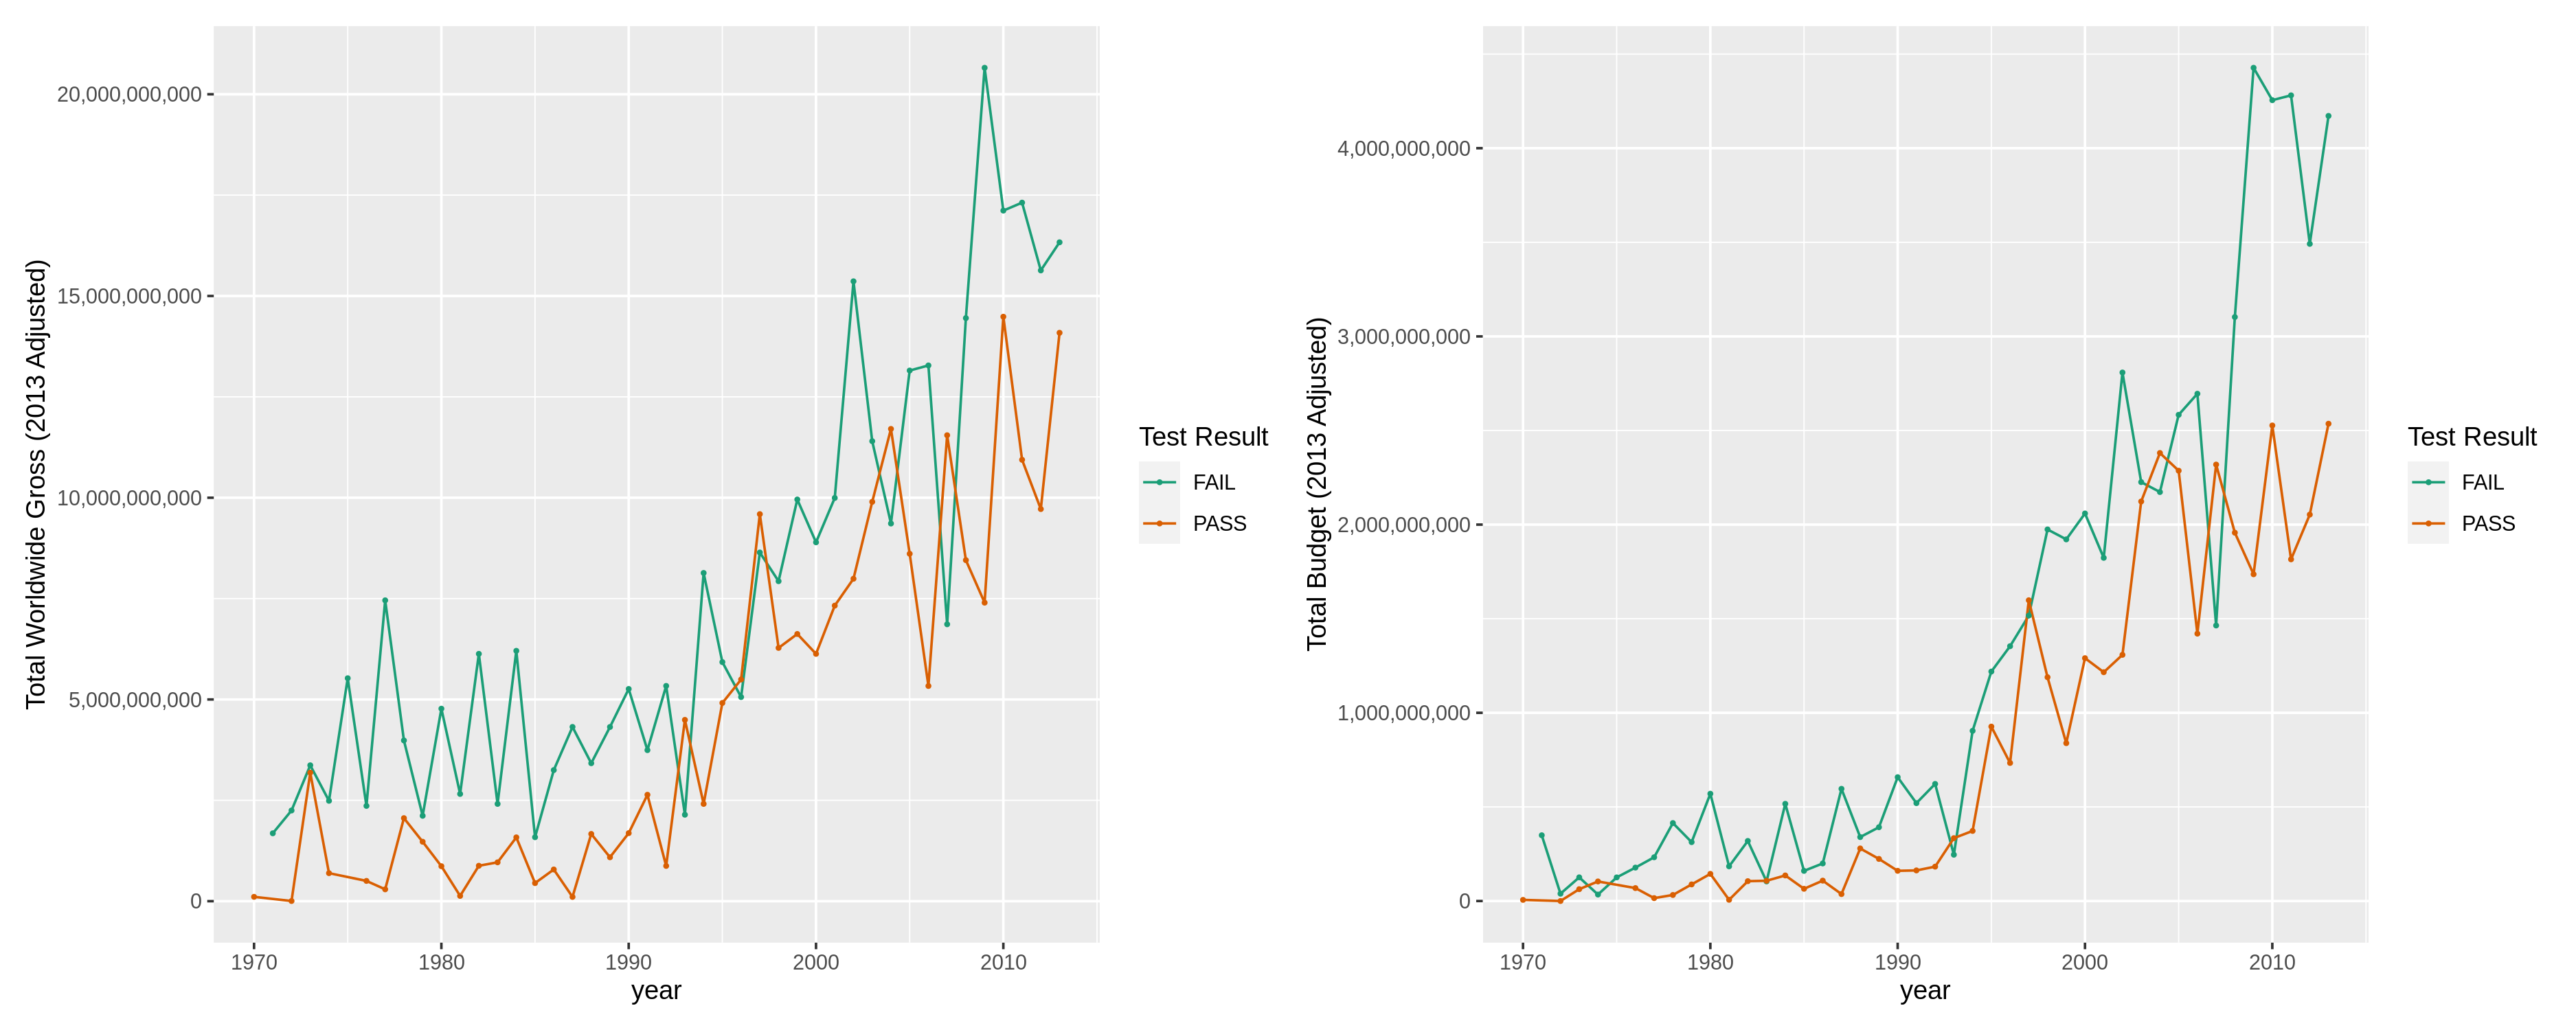

In [14]:
options(repr.plot.width = 15, repr.plot.height = 6, repr.plot.res = 250)
p1 = p1 + scale_color_brewer(palette = 'Dark2')
p1 = p1 + theme_gray()
p2 = p2 + theme_gray()
p2 = p2 + scale_color_brewer(palette = 'Dark2')
p3 = p1 + p2
p3

#2 plots showing worldwide gross and budget of films by their Bechdel Test Results.

The plots above depicts 2 trends. The plot on the left shows the total gross of all the films that passed and failed the test in a given year and how that trend has changed over time. Similarly, the plot on the left shows the total budget of all the films that passed and failed the test in a given year and how that has evolved. Other than a couple instances (1993, 1997, and 2004), the total budget or gross of films that passed the test never exceeds that of the films that failed the test. This is most likely because films that gross large amounts favor blockbuster action over sensitive character development. Furthermore, films that favor more intimate character development and drama are more likely to be lower budget films, explaining the disparity in the 2nd plot. 